# Regression Trees

In [1]:
library(rsample)     # data splitting 
library(dplyr)       # data wrangling
library(rpart)       # performing regression trees
library(rpart.plot)  # plotting regression trees
library(ipred)       # bagging
library(caret)       # bagging

Warning message:
"package 'rsample' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [6]:
install.packages("AmesHousing")

package 'AmesHousing' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Microsoft\AppData\Local\Temp\Rtmp8s9lLF\downloaded_packages


In [7]:
set.seed(123)
ames_split <- initial_split(AmesHousing::make_ames(), prop = .7)
ames_train <- training(ames_split)
ames_test  <- testing(ames_split)

In [11]:
AmesHousing::make_ames()

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078
One_Story_PUD_1946_and_Newer,Residential_Low_Density,41,4920,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2010,WD,Normal,213500,-93.63379,42.06298
One_Story_PUD_1946_and_Newer,Residential_Low_Density,43,5005,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,None,0,1,2010,WD,Normal,191500,-93.63383,42.06073
One_Story_PUD_1946_and_Newer,Residential_Low_Density,39,5389,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,3,2010,WD,Normal,236500,-93.63285,42.06112
Two_Story_1946_and_Newer,Residential_Low_Density,60,7500,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,6,2010,WD,Normal,189000,-93.63907,42.05919


In [12]:
m1 <- rpart(formula = Sale_Price~.,
           data = ames_test,
           method = "anova")

In [13]:
m1

n= 879 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 879 5.952664e+12 180844.0  
   2) Overall_Qual=Poor,Fair,Below_Average,Average,Above_Average,Good 739 1.749652e+12 155806.9  
     4) Overall_Qual=Poor,Fair,Below_Average,Average,Above_Average 554 7.600896e+11 139237.3  
       8) Garage_Type=CarPort,Detchd,No_Garage 255 2.211079e+11 118977.5 *
       9) Garage_Type=Attchd,Basment,BuiltIn,More_Than_Two_Types 299 3.450490e+11 156515.8  
        18) Full_Bath< 1.5 174 9.983538e+10 140911.7 *
        19) Full_Bath>=1.5 125 1.438716e+11 178236.8 *
     5) Overall_Qual=Good 185 3.819806e+11 205426.1  
      10) Gr_Liv_Area< 2029 154 2.160602e+11 195169.5  
        20) Total_Bsmt_SF< 1469 128 1.045246e+11 185188.6 *
        21) Total_Bsmt_SF>=1469 26 3.601027e+10 244306.0 *
      11) Gr_Liv_Area>=2029 31 6.924028e+10 256378.2 *
   3) Overall_Qual=Very_Good,Excellent,Very_Excellent 140 1.294485e+12 313004.1  
     6) Mas_Vnr_Area< 416 108 4.314658e+11 281514.7  


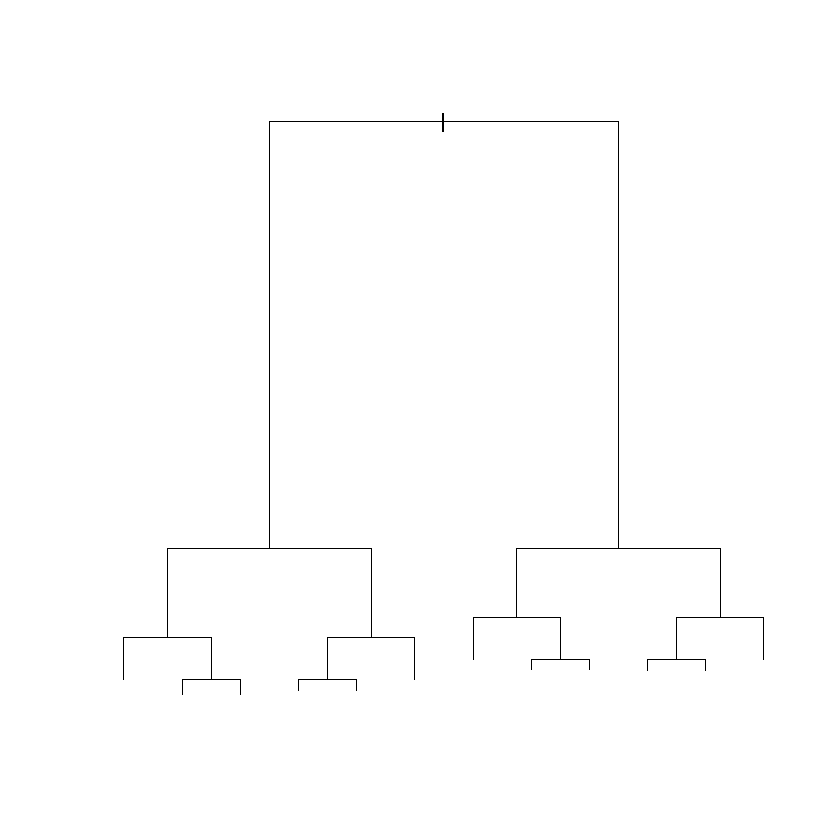

In [14]:
plot(m1)

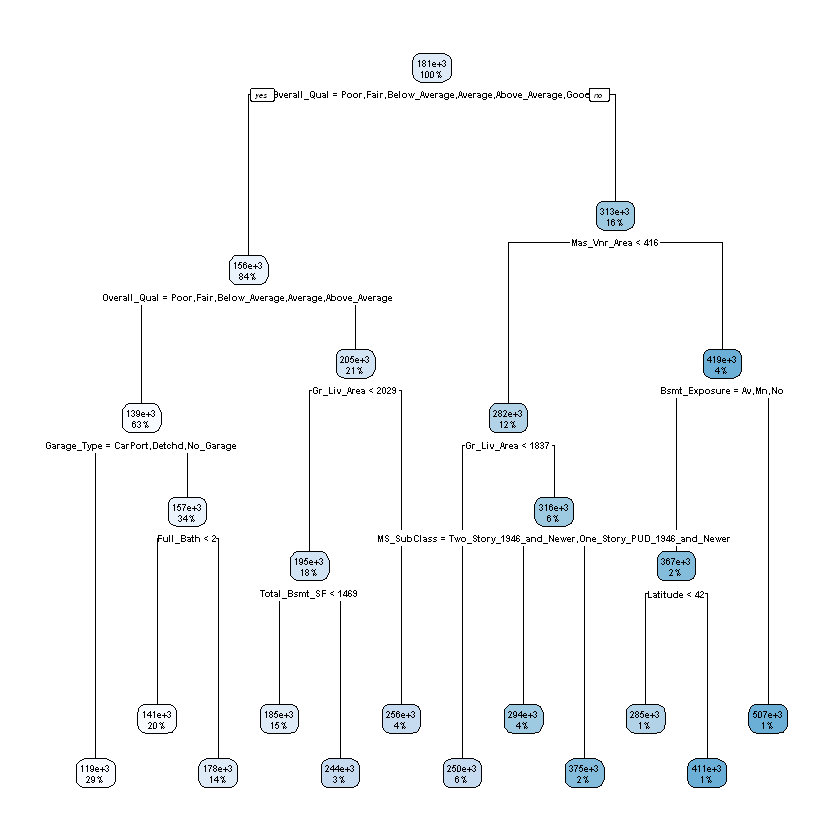

In [15]:
rpart.plot(m1)

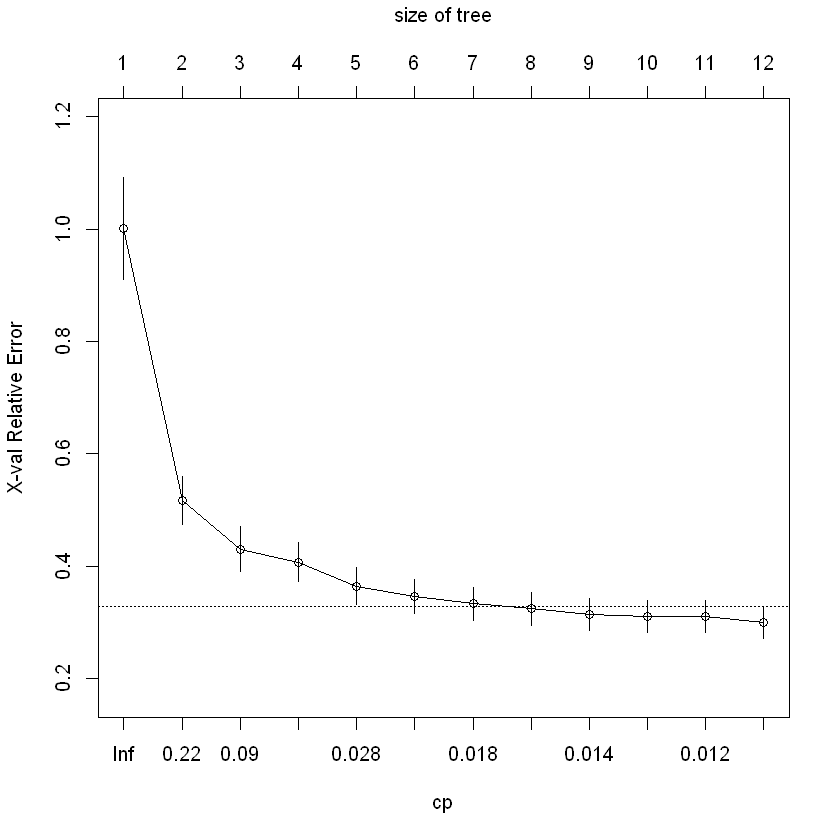

In [16]:
plotcp(m1)

In [17]:
m2 <- rpart(formula = Sale_Price~.,
           data = ames_train,
           method = "anova",
           control = list(cp = 0,
                         xval = 10))

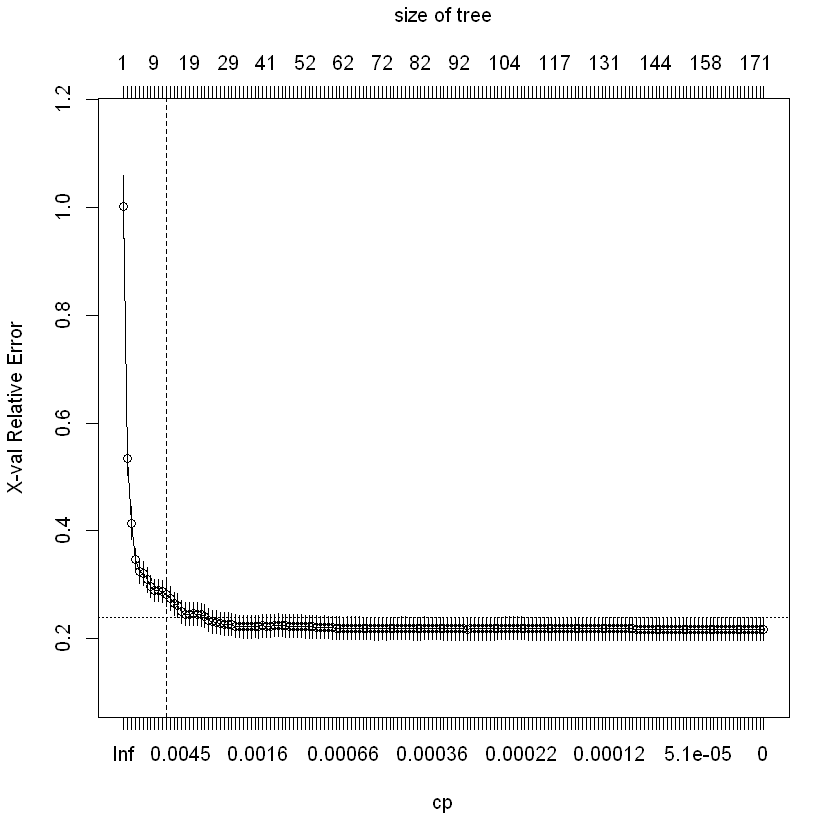

In [18]:
plotcp(m2)
abline(v = 12,lty="dashed")

In [19]:
m1$cptable

CP,nsplit,rel error,xerror,xstd
0.48860927,0,1.0000000,1.0010699,0.09091631
0.10206895,1,0.5113907,0.5165928,0.04224455
0.07870797,2,0.4093218,0.4301460,0.04063310
0.03257915,3,0.3306138,0.4070635,0.03505199
0.02471059,4,0.2980347,0.3642451,0.03268517
0.01973434,5,0.2733241,0.3450953,0.03020449
0.01702465,6,0.2535897,0.3330597,0.02923937
0.01624148,7,0.2365651,0.3238028,0.02877611
0.01268767,8,0.2203236,0.3130948,0.02872989
0.01217944,9,0.2076359,0.3100952,0.02870936


* minsplit: the minimum number of data points required to attempt a split before it is forced to create a terminal node. The default is 20. Making this smaller allows for terminal nodes that may contain only a handful of observations to create the predicted value.
* maxdepth: the maximum number of internal nodes between the root node and the terminal nodes. The default is 30, which is quite liberal and allows for fairly large trees to be built.

In [20]:
m3 <- rpart(
formula = Sale_Price~.,
data = ames_train,
method = "anova",
control = list(minsplit = 10,maxdepth =12,xval=10))

In [21]:
m3$cptable

CP,nsplit,rel error,xerror,xstd
0.46690132,0,1.0000000,1.0012666,0.05859807
0.11961409,1,0.5330987,0.5344017,0.03108978
0.06955813,2,0.4134846,0.4171021,0.03054859
0.02559992,3,0.3439265,0.3492983,0.02218315
0.02196620,4,0.3183265,0.3278244,0.02196862
0.02023390,5,0.2963603,0.3191771,0.02254758
0.01674138,6,0.2761264,0.3073380,0.02236654
0.01188709,7,0.2593850,0.2935670,0.02513821
0.01127889,8,0.2474980,0.3005609,0.02781121
0.01109955,9,0.2362191,0.2971675,0.02770535


In [22]:
hyper_grid <- expand.grid(
minsplit = seq(5,20,1),
maxdepth = seq(8,15,1))

In [23]:
head(hyper_grid)

minsplit,maxdepth
5,8
6,8
7,8
8,8
9,8
10,8


In [24]:
nrow(hyper_grid)

[1] 128

In [26]:
models <- list()
for (i in 1:nrow(hyper_grid))
    {
    minsplit <- hyper_grid$minsplit[i]
    maxdepth <- hyper_grid$maxdepth[i]

    models[[i]] <- rpart(
    formula = Sale_Price~.,
    data = ames_train,
    method = "anova",
    control = list(minsplit=minsplit,maxdepth = maxdepth))
    
}


In [27]:
get_cp <- function(x){
    min <- which.min(x$cptable[,"xerror"])
    cp <- x$cptable[min,"CP"]
}
##### function to get minimum error
get_min_error  <- function(x){
    min <- which.min(x$cptable[,"xerror"])
    xerror <- x$cptable[min,"xerror"]
}

hyper_grid %>%
mutate(
 cp = purrr::map_dbl(models,get_cp),
 error = purrr::map_dbl(models,get_min_error))%>%
arrange(error)%>%
top_n(-5,wt = error)

minsplit,maxdepth,cp,error
19,9,0.01,0.2634445
8,13,0.01,0.2637027
7,10,0.01,0.2639606
10,12,0.01,0.2656227
15,12,0.01,0.2668214


In [28]:
optimal_tree <- rpart(
formula = Sale_Price~.,
data = ames_train,
method = "anova",
control = list(minsplit = 11,maxdepth = 8,cp=0.01))


In [29]:
pred <- predict(optimal_tree,newdata = ames_test)
RMSE(pred = pred, obs = ames_test$Sale_Price)

[1] 39852.01

# Bagging

As previously mentioned, single tree models suffer from high variance. Although pruning the tree helps reduce this variance, there are alternative methods that actually exploite the variability of single trees in a way that can significantly improve performance over and above that of single trees. 

Bagging combines and averages multiple models. Averaging across multiple trees reduces the variability of any one tree and reduces overfitting, which improves predictive performance. 

1. Create m bootstrap samples from the training data. Bootstrapped samples allow us to create many slightly different data sets but with the same distribution as the overall training set.
2. For each bootstrap sample train a single, unpruned regression tree.
3. Average individual predictions from each tree to create an overall average predicted value.

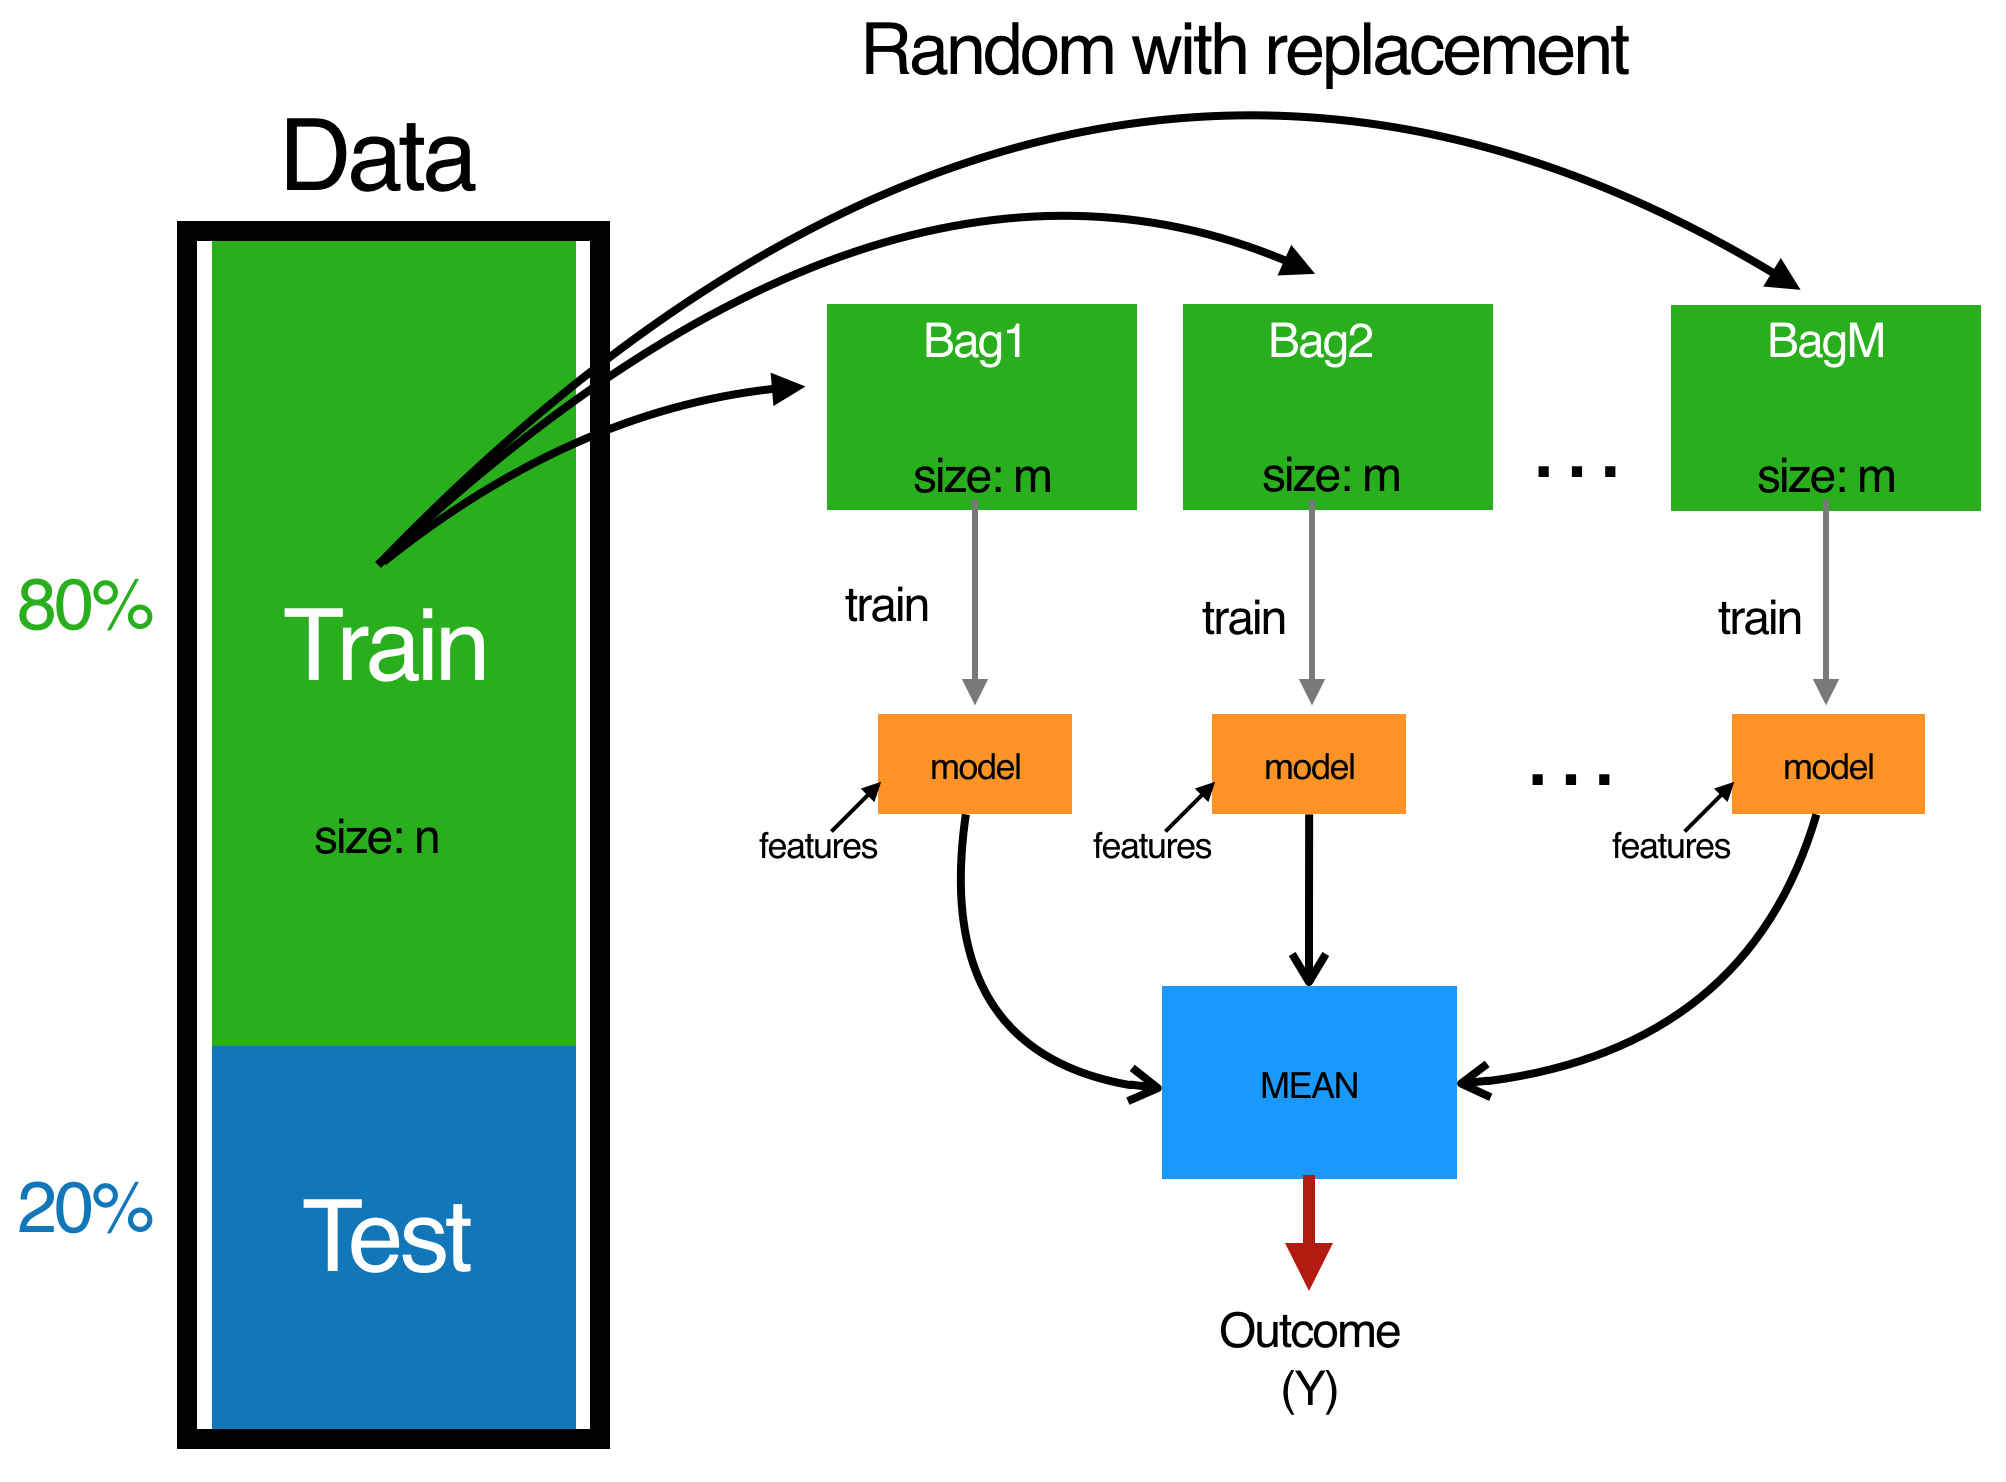

In [30]:
library("IRdisplay")
display_png(file="bagging3.png")  

In [31]:
set.seed(123)

In [33]:
bagged_ml <- bagging(formula = Sale_Price~.,
                    data = ames_train,
                    coob = TRUE)

In [34]:
bagged_ml


Bagging regression trees with 25 bootstrap replications 

Call: bagging.data.frame(formula = Sale_Price ~ ., data = ames_train, 
    coob = TRUE)

Out-of-bag estimate of root mean squared error:  36991.67 


In [36]:
ntree <- 10:50
rmse <- vector(mode = "numeric",length = length(ntree))
for (i in seq_along(ntree))
    {
    set.seed(123)
    model <- bagging(
    formula = Sale_Price~.,
    data = ames_train,
    coob = TRUE,
    nbagg =ntree[i])

    rmse[i] <- model$err
}


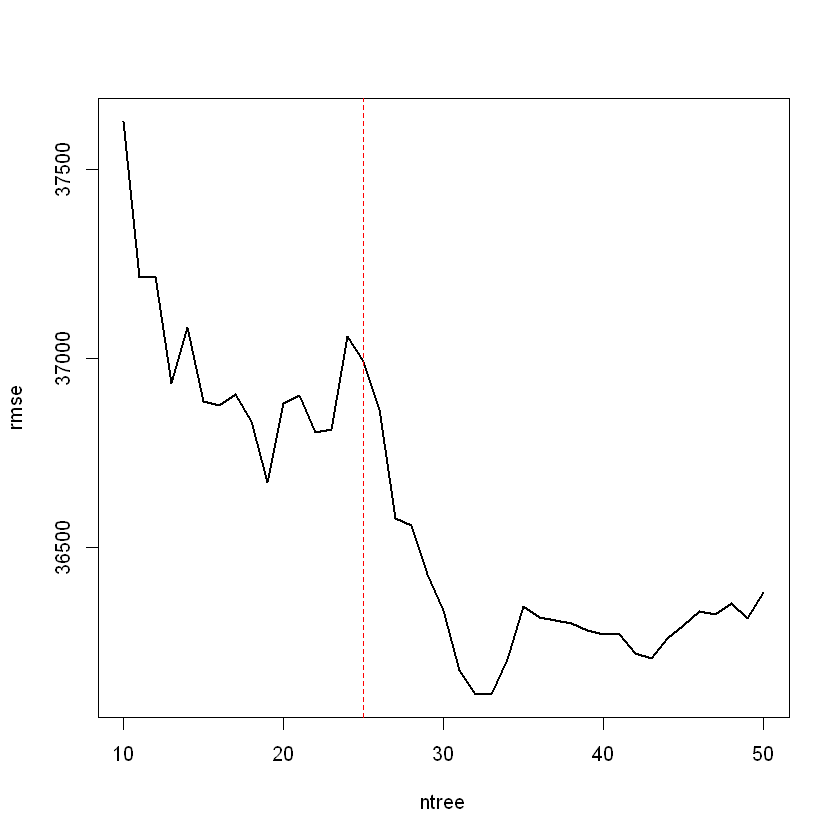

In [37]:
plot(ntree,rmse,type = 'l',lwd =2)
abline(v=25,col = "red",lty = "dashed")

In [38]:
ctrl <- trainControl(method ="cv",number = 10)

bagged_cv <- train(
Sale_Price~.,
data = ames_train,
method = "treebag",
trControl = ctrl,
importance = TRUE)

In [39]:
bagged_cv

Bagged CART 

2051 samples
  80 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1846, 1845, 1846, 1845, 1847, 1847, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  35854.02  0.8009063  23785.85


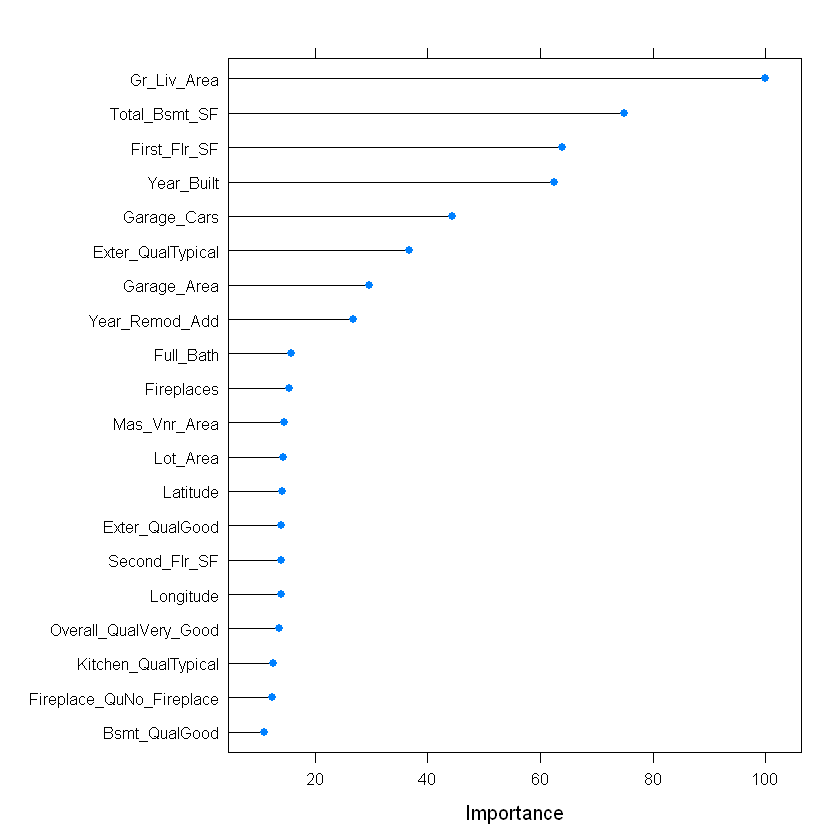

In [40]:
plot(varImp(bagged_cv),20)

**What is CP**?<br><br>
The complexity parameter (cp) is used to control the size of the decision tree and to select the optimal tree size. If the cost of adding another variable to the decision tree from the current node is above the value of cp, then tree building does not continue.<br>
**What is BootStrap?**<br><br>
Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting.
**What is Over-fitting?** <br> <br>
Overfitting refers to a model that models the training data too well. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.